Summary of magicblast


In [1]:
import numpy as np
import os.path
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from pandas.plotting import scatter_matrix
import pathlib
import warnings
warnings.filterwarnings('ignore')

In [2]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:95% !important; }</style>"))

In [3]:
PROJECT_CODE='PRJNA606875'
BASE_PATH = f'/mnt/1TB_0/Data/Assembly/{PROJECT_CODE}/'

dbname='nt'
kmer='k141'
kmer_extra='k29'

#magicblast on contigs
magic_blast_sam_tail=f'_{dbname}_final_contigs_magicBLAST.sam'
f_contigs_file_tail=f'_{dbname}_magic_blast_asc_contigs.txt'
GIS,ACCESSIONS,TITLES=None,None,None

### All SRA's

In [4]:
sra_list=['SRR11093265', 'SRR11093266','SRR11093267','SRR11093268','SRR11093269','SRR11093270','SRR11093271']

In [5]:
def read_gi_accession_title(gi_asc_file):
    gis=[]
    accessions=[]
    titles=[]
    with open(gi_asc_file, 'r') as infile:
        data = infile.readlines()
        for i in data:
            output=i.split(' ',2)
            gis.append(output[0])
            accessions.append(output[1])
            titles.append(output[2])
    return gis, accessions, titles

In [6]:
def set_accessions():
    global GIS
    global ACCESSIONS
    global TITLES
    GIS,ACCESSIONS,TITLES=read_gi_accession_title('/mnt/1TB_ssd/Data/BLAST/nt.gi_taxid.tsv')

### Stats

In [7]:
def get_asc_descr_count(sra): 
    accessions=[]
    descriptions=[]
    counts=[]
    path = BASE_PATH+sra+'/magic_blast/'
    f_mer=path+f'{sra}_{dbname}_{kmer}_magicBLAST_summary.txt'
    if not os.path.isfile(f_mer):
        f_mer=path+f'{sra}_{dbname}_{kmer_extra}_magicBLAST_summary.txt'
    assert os.path.isfile(f_mer)
    with open(f_mer, 'r') as f:
        lines = [line.rstrip('\n') for line in f]
        total=len(lines)-1
        for line in lines:
            if not 'database:' in line: #ignore header
                asc=line.split(None, 1)[0]
                title=line.split(None, 1)[1].split(', count:')[0]
                count=line.split(None, 1)[1].split(', count:')[1]
                accessions.append(asc)
                descriptions.append(title)
                counts.append(int(count))
    return accessions, descriptions, counts, total


In [8]:
def get_indexes(substr, str_list):
    index_list = []
    i = 0
    for e in str_list:
        if substr in e.lower():
            index_list.append(i)
        i +=1
    return index_list

In [9]:
for i,sra in enumerate(sra_list):
    accessions, descriptions, counts, total=get_asc_descr_count(sra)
    print(f'{sra}, matched contigs: {sum(counts)}')

SRR11093265, matched contigs: 44
SRR11093266, matched contigs: 549
SRR11093267, matched contigs: 2056
SRR11093268, matched contigs: 189
SRR11093269, matched contigs: 1698
SRR11093270, matched contigs: 19067
SRR11093271, matched contigs: 156


In [10]:
def get_desc_count(qstring, descriptions, counts, lowercase=True):
    qd=[]
    qc=0
    for d,c in zip(descriptions, counts):
        if lowercase:
            if qstring.lower() in d.lower():
                qd.append(d)
                qc=qc+int(c)
        else:
            if qstring in d:
                qd.append(d)
                qc=qc+int(c)
    return qd, qc
    

In [11]:
def get_descr(sra):
    accessions, descriptions, counts, total=get_asc_descr_count(sra)
    print(f'sra: {sra}, accessions: {len(accessions)}, descriptions: {len(descriptions)}, counts: {len(counts)}, total: {total}')
    if total>0:
        human,humanc = get_desc_count('human', descriptions, counts) 
        homo_sapiens,homo_sapiensc = get_desc_count('homo sapiens', descriptions, counts)
        h_sapiens,h_sapiensc = get_desc_count('h.sapiens', descriptions, counts)
        human_contigs = human+homo_sapiens+h_sapiens
        human_counts = humanc+homo_sapiensc+h_sapiensc
        pangolin, pangolinc = get_desc_count('manis javanica', descriptions, counts) 
        pangolin_p, pangolin_pc = get_desc_count('manis pentadactyla', descriptions, counts) 
        pangolin=pangolin+pangolin_p
        pangolin_counts=pangolinc+pangolin_pc
        mouse,mousec = get_desc_count('mus musculus', descriptions, counts) 
        vector,vectorc= get_desc_count('vector', descriptions, counts) 
        pig,pigc = get_desc_count('sus scrofa', descriptions, counts)
        cat,catc = get_desc_count('felis catus', descriptions, counts)  
        tiger,tigerc = get_desc_count('panthera tigris', descriptions, counts) 
        dog,dogc = get_desc_count('canis lupus', descriptions, counts) 
        virus,virusc = get_desc_count('virus', descriptions, counts)  
        
        mulatta,mulattac = get_desc_count('mulatta', descriptions, counts) 
        troglodytes,troglodytesc = get_desc_count('troglodytes', descriptions, counts)
        pongo,pongoc =get_desc_count('pongo', descriptions, counts)  
        papio,papioc = get_desc_count('papio', descriptions, counts) 
        mandrillus,mandrillusc =get_desc_count('mandrillus', descriptions, counts)  
        cercocebus,cercocebusc =get_desc_count('cercocebus', descriptions, counts) 
        gelada,geladac =get_desc_count('gelada', descriptions, counts)  
        monkey = mulatta+troglodytes+pongo+papio+mandrillus+cercocebus+gelada
        monkey_counts = mulattac+troglodytesc+pongoc+papioc+mandrillusc+cercocebusc+geladac
        
        mustela,mustelac= get_desc_count('mustela', descriptions, counts) 

        pipistrellus,pipistrellusc =get_desc_count('pipistrellus', descriptions, counts) 
        rhinolophus,rhinolophusc = get_desc_count('rhinolophus', descriptions, counts) 
        pteropus,pteropusc = get_desc_count('pteropus', descriptions, counts) 
        myotis,myotisc = get_desc_count('myotis', descriptions, counts) 
        bat = pipistrellus + rhinolophus+pteropus+myotis
        bat_counts = pipistrellusc + rhinolophusc+pteropusc+myotisc
        
        mycoplasma,mycoplasmac = get_desc_count('mycoplasma', descriptions, counts) 
        
        lst = ['human', 'monkey', 'pangolin', 'mouse', 
                'pig', 'cat', 'tiger', 'dog', 'bat', 'virus', 'vector','mycoplasma','mustela']
        lengths = [human_counts, monkey_counts, pangolin_counts, mousec,  
                pigc, catc, tigerc, dogc, bat_counts, virusc, vectorc, mycoplasmac,mustelac]
        final_contigs=BASE_PATH+sra+'/megahit_default/final.contigs.fa'
        with open(final_contigs) as final_contigs_file:
            total_contigs=sum(1 for _ in final_contigs_file)
        res = [int(i) for i in counts]
        total_contigs_matched=sum(res)
        sra_l=[sra]*len(lst)
        fractions_matched = [human_counts/total_contigs_matched, monkey_counts/total_contigs_matched, pangolin_counts/total_contigs_matched, mousec/total_contigs_matched,  
                pigc/total_contigs_matched, catc/total_contigs_matched, tigerc/total_contigs_matched, dogc/total_contigs_matched, bat_counts/total_contigs_matched, 
                             virusc/total_contigs_matched, vectorc/total_contigs_matched, mycoplasmac/total_contigs_matched, mustelac/total_contigs_matched]
        pct_matched = [round(i * 100,2) for i in fractions_matched]
        df = pd.DataFrame(list(zip(sra_l, lst, lengths, pct_matched)),
                   columns =['SRA','Name', 'count', 'pct_matched'])
        return df
    return None

In [12]:
sns.set(rc={"figure.figsize":(4, 4)})
def plot_df(df, sra):
    ax=df.plot(x='Name', y='count', kind='bar')
    ax.set_title(sra, fontsize=12)
    #ax.set_yscale('log')
    #ax.set_ylim([0,df['count'].max()+10])
    ax.set_ylim(bottom=0)
    fig = plt.gcf()
    fig.savefig(BASE_PATH+sra+'/magic_blast/'+f'{sra}_{dbname}_{kmer}_magicBLAST_species.png', bbox_inches="tight")

SRR11093265
sra: SRR11093265, accessions: 10, descriptions: 10, counts: 10, total: 10
           SRA      Name  count  pct_matched
0  SRR11093265     human      0          0.0
1  SRR11093265    monkey      0          0.0
2  SRR11093265  pangolin      0          0.0
3  SRR11093265     mouse      0          0.0
4  SRR11093265       pig      0          0.0
SRR11093266
sra: SRR11093266, accessions: 34, descriptions: 34, counts: 34, total: 34
           SRA      Name  count  pct_matched
0  SRR11093266     human      6         1.09
1  SRR11093266    monkey      0         0.00
2  SRR11093266  pangolin     10         1.82
3  SRR11093266     mouse      2         0.36
4  SRR11093266       pig      0         0.00
SRR11093267
sra: SRR11093267, accessions: 100, descriptions: 100, counts: 100, total: 100
           SRA      Name  count  pct_matched
0  SRR11093267     human      6         0.29
1  SRR11093267    monkey      4         0.19
2  SRR11093267  pangolin     57         2.77
3  SRR11093267    

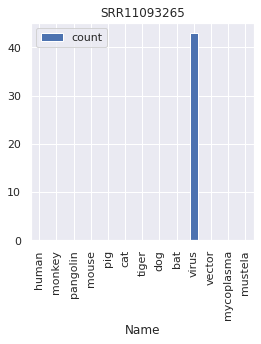

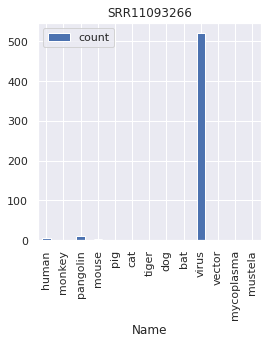

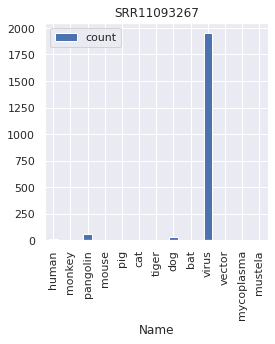

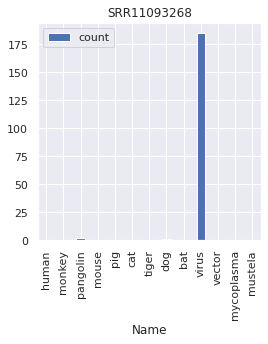

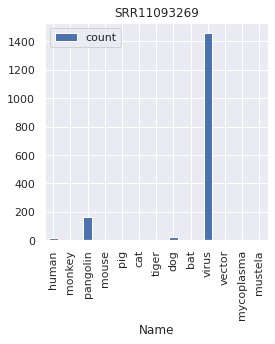

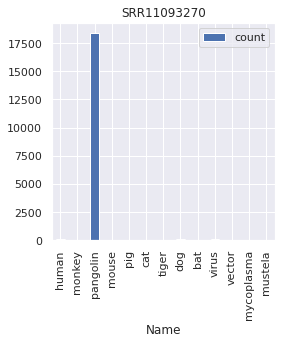

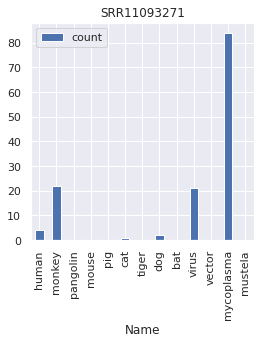

In [13]:
for sra in sra_list:
    print(sra)
    try:
        df=get_descr(sra)
        print(df.head())
        df.to_csv(BASE_PATH+sra+'/magic_blast/'+f'{sra}_{dbname}_{kmer}_magicBLAST_species_df.csv')
        plot_df(df, sra)
    except FileNotFoundError:
        print(e)
        pass
    except AttributeError:
        pass

In [14]:
pathlib.Path(BASE_PATH+'general_plots/').mkdir(exist_ok=True)

def multi_plot():
    fig, axis = plt.subplots(2, 5,figsize=(16,8))
    fig.suptitle('Contig counts')
    sra=sra_list[0]
    df=get_descr(sra)
    axis[0,0].bar(df['Name'],df['count'])
    axis[0,0].tick_params(axis='x', rotation=90)
    axis[0,0].set_ylabel('count')
    axis[0,0].title.set_text(sra)
    
    sra=sra_list[1]
    df=get_descr(sra)
    axis[0,1].bar(df['Name'],df['count'])
    axis[0,1].set_ylabel('count')
    axis[0,1].tick_params(axis='x', rotation=90)
    axis[0,1].set_ylabel('count')
    axis[0,1].title.set_text(sra)
    
    sra=sra_list[2]
    df=get_descr(sra)
    axis[0,2].bar(df['Name'],df['count'])
    axis[0,2].set_ylabel('count')
    axis[0,2].tick_params(axis='x', rotation=90)
    axis[0,2].set_ylabel('count')
    axis[0,2].title.set_text(sra)
    
    sra=sra_list[3]
    df=get_descr(sra)
    axis[0,3].bar(df['Name'],df['count'])
    axis[0,3].set_ylabel('count')
    axis[0,3].tick_params(axis='x', rotation=90)
    axis[0,3].set_ylabel('count')
    axis[0,3].title.set_text(sra)
    
    sra=sra_list[4]
    df=get_descr(sra)
    axis[0,4].bar(df['Name'],df['count'])
    axis[0,4].set_ylabel('count')
    axis[0,4].tick_params(axis='x', rotation=90)
    axis[0,4].set_ylabel('count')
    axis[0,4].title.set_text(sra)
    
    
    sra=sra_list[5]
    df=get_descr(sra)
    axis[1,0].bar(df['Name'],df['count'])
    axis[1,0].set_ylabel('count')
    axis[1,0].tick_params(axis='x', rotation=90)
    axis[1,0].set_ylabel('count')
    axis[1,0].title.set_text(sra)
    
    sra=sra_list[6]
    df=get_descr(sra)
    axis[1,1].bar(df['Name'],df['count'])
    axis[1,1].set_ylabel('count')
    axis[1,1].tick_params(axis='x', rotation=90)
    axis[1,1].set_ylabel('count')
    axis[1,1].title.set_text(sra)

    fig.tight_layout()
    fig.savefig(BASE_PATH+'general_plots/'+f'{sra}_{dbname}_{kmer}_magicBLAST_contig_count_matrix.png', bbox_inches="tight")
    plt.show()
    

sra: SRR11093265, accessions: 10, descriptions: 10, counts: 10, total: 10
sra: SRR11093266, accessions: 34, descriptions: 34, counts: 34, total: 34
sra: SRR11093267, accessions: 100, descriptions: 100, counts: 100, total: 100
sra: SRR11093268, accessions: 10, descriptions: 10, counts: 10, total: 10
sra: SRR11093269, accessions: 223, descriptions: 223, counts: 223, total: 223
sra: SRR11093270, accessions: 11832, descriptions: 11832, counts: 11832, total: 11832
sra: SRR11093271, accessions: 74, descriptions: 74, counts: 74, total: 74


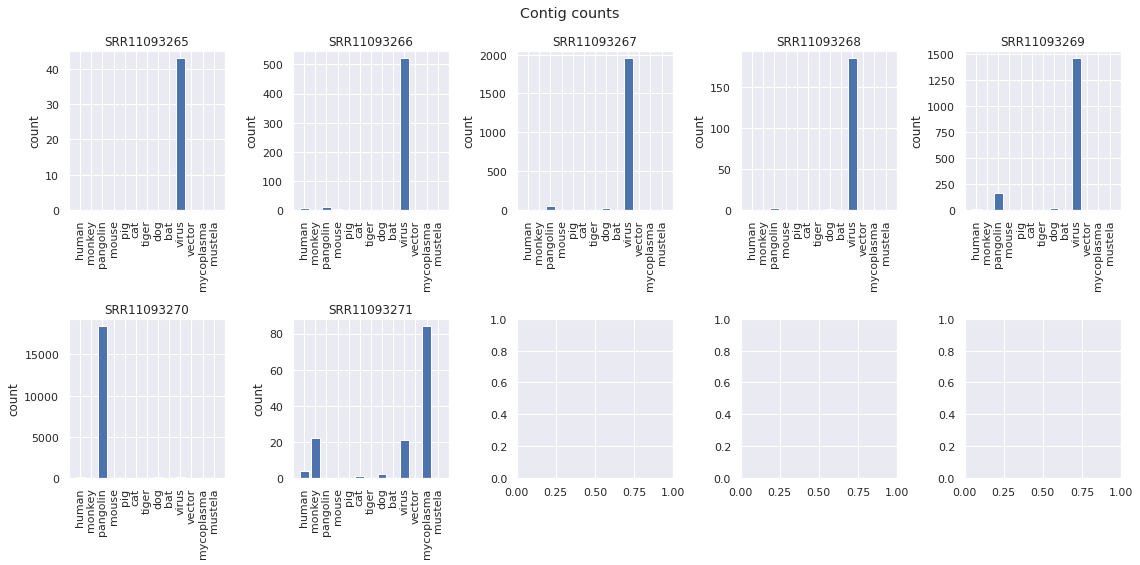

In [15]:
multi_plot()

In [16]:
frames=[]
for i,sra in enumerate(sra_list):
    try:
        df = pd.read_csv(BASE_PATH+sra+'/magic_blast/'+f'{sra}_{dbname}_{kmer}_magicBLAST_species_df.csv')
        x = df.Name.astype('category')
        df['species_uid'] =x.cat.codes
        df['SRA_val'] =df.SRA.str.strip('SRR')
        df['SRA_val'] = pd.to_numeric(df['SRA_val'])
        frames.append(df)
    except FileNotFoundError:
        pass
df_sra = pd.concat(frames)

In [17]:
df_sra.drop(columns=['Unnamed: 0'],inplace=True)

In [18]:
df_sra.head(n=10)

,SRA,Name,count,pct_matched,species_uid,SRA_val
0,SRR11093265,human,0,0.00,3,11093265
1,SRR11093265,monkey,0,0.00,4,11093265
2,SRR11093265,pangolin,0,0.00,8,11093265
3,SRR11093265,mouse,0,0.00,5,11093265
4,SRR11093265,pig,0,0.00,9,11093265
5,SRR11093265,cat,0,0.00,1,11093265
6,SRR11093265,tiger,0,0.00,10,11093265
7,SRR11093265,dog,0,0.00,2,11093265
8,SRR11093265,bat,0,0.00,0,11093265
9,SRR11093265,virus,43,97.73,12,11093265


In [19]:
df_sra.Name.unique()

array(['human', 'monkey', 'pangolin', 'mouse', 'pig', 'cat', 'tiger',
       'dog', 'bat', 'virus', 'vector', 'mycoplasma', 'mustela'],
      dtype=object)

### All nt database matches

In [20]:
total_dict={}
asc_desc={}
for sra in sra_list:
    accessions, descriptions, counts, total=get_asc_descr_count(sra)
    for asc,desc,cnt in zip(accessions,descriptions, counts):
        if asc in total_dict:
            total_dict[asc]+=int(cnt)
        else:
            total_dict[asc]=int(cnt)
        if asc not in asc_desc:
            asc_desc[asc]=desc

In [21]:
assert len(total_dict)==len(asc_desc)

In [22]:
len(asc_desc)

12158

Print out the 100 most common nt database classification for all contigs in the project

In [23]:
def print_top_n_sp(total_dict, max_num):
    listofTuples = sorted(total_dict.items() , reverse=True, key=lambda x: x[1])
    for i, elem in enumerate(listofTuples):
        if i<max_num:
            print(asc_desc[elem[0]], ": " , elem[1] )
        else:
            break
    

In [24]:
print_top_n_sp(total_dict, max_num=10)

Pangolin coronavirus isolate PCoV_GX-P5L, complete genome :  837
Pangolin coronavirus isolate PCoV_GX-P1E, complete genome :  787
Pangolin coronavirus isolate PCoV_GX-P2V, complete genome :  756
Pangolin coronavirus isolate PCoV_GX-P4L, complete genome :  715
Pangolin coronavirus isolate PCoV_GX-P5E, complete genome :  641
Pangolin coronavirus isolate PCoV_GX-P3B genomic sequence :  478
PREDICTED: Manis javanica proline rich coiled-coil 2A (PRRC2A), mRNA :  15
Pangolin coronavirus isolate MP789, complete genome :  14
Manis javanica isolate MP_PG03-UM mitochondrion, complete genome :  14
PREDICTED: Manis javanica LDL receptor related protein 1 (LRP1), transcript variant X3, mRNA :  14


### Human

In [25]:
df=df_sra[df_sra['Name'].str.contains('human')]

count             AxesSubplot(0.125,0.71587;0.168478x0.16413)
pct_matched    AxesSubplot(0.327174,0.71587;0.168478x0.16413)
dtype: object

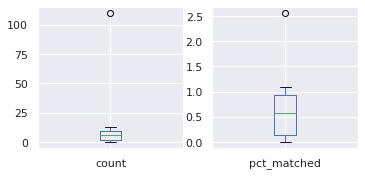

In [26]:
df.drop(columns=['Name'],inplace=True)
sns.set(rc={"figure.figsize":(6, 6)})
df_box=df[['count', 'pct_matched']]
df_box.plot(kind='box', subplots=True, layout=(4,4), sharex=False, sharey=False, figsize=(12,12))

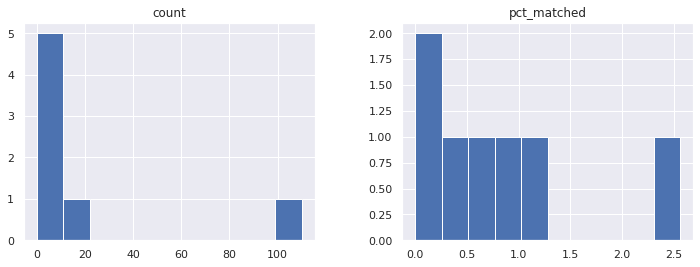

In [27]:
df_box.hist(figsize=(12,4))
plt.show()

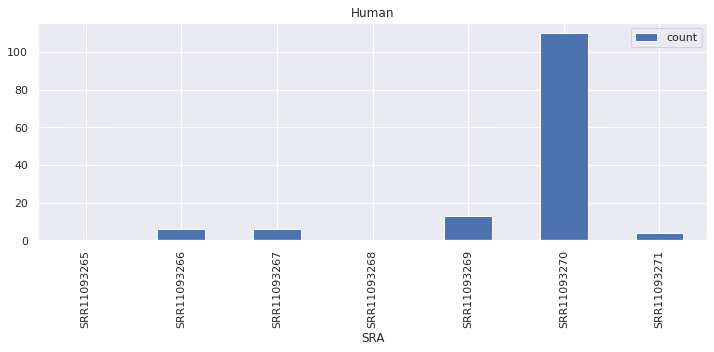

In [28]:
ax=df.plot(x='SRA', y='count', kind='bar',figsize=(12,4))
ax.set_title('Human', fontsize=12)
plt.show()

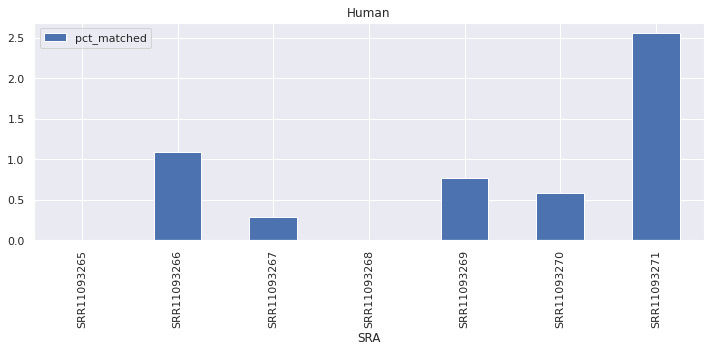

In [29]:
ax=df.plot(x='SRA', y='pct_matched', kind='bar',figsize=(12,4))
ax.set_title('Human', fontsize=12)
plt.show()

### Monkey

In [30]:
s_name='monkey'

In [31]:
df=df_sra[df_sra['Name'].str.contains(s_name)]

count             AxesSubplot(0.125,0.71587;0.168478x0.16413)
pct_matched    AxesSubplot(0.327174,0.71587;0.168478x0.16413)
dtype: object

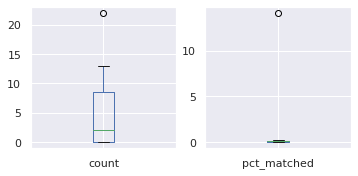

In [32]:
df.drop(columns=['Name'],inplace=True)
sns.set(rc={"figure.figsize":(6, 6)})
df_box=df[['count', 'pct_matched']]
df_box.plot(kind='box', subplots=True, layout=(4,4), sharex=False, sharey=False, figsize=(12,12))

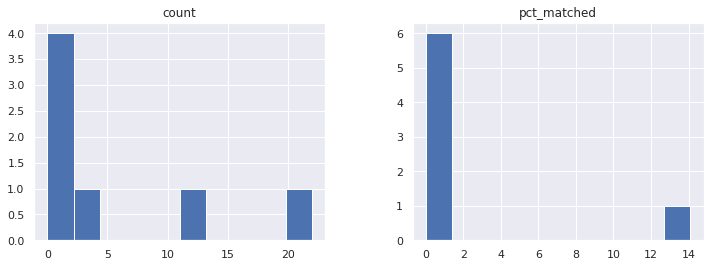

In [33]:
df_box.hist(figsize=(12,4))
plt.show()

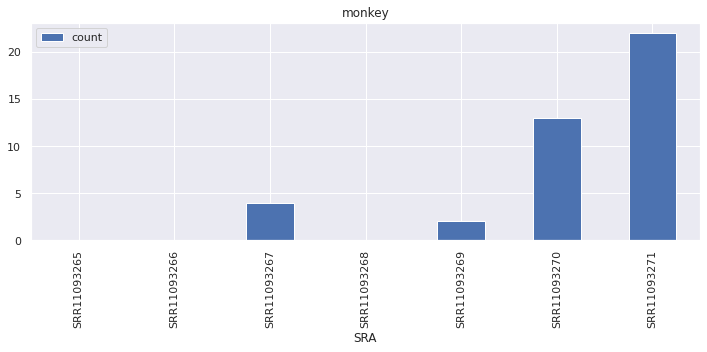

In [34]:
ax=df.plot(x='SRA', y='count', kind='bar',figsize=(12,4))
ax.set_title(s_name, fontsize=12)
plt.show()

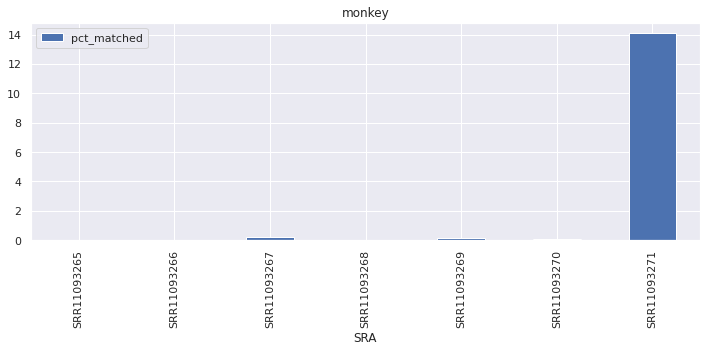

In [35]:
ax=df.plot(x='SRA', y='pct_matched', kind='bar',figsize=(12,4))
ax.set_title(s_name, fontsize=12)
plt.show()

### Pangolin

In [36]:
s_name='pangolin'

In [37]:
df=df_sra[df_sra['Name'].str.contains(s_name)]

count             AxesSubplot(0.125,0.71587;0.168478x0.16413)
pct_matched    AxesSubplot(0.327174,0.71587;0.168478x0.16413)
dtype: object

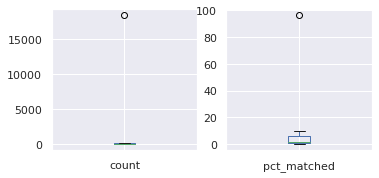

In [38]:
df.drop(columns=['Name'],inplace=True)
sns.set(rc={"figure.figsize":(6, 6)})
df_box=df[['count', 'pct_matched']]
df_box.plot(kind='box', subplots=True, layout=(4,4), sharex=False, sharey=False, figsize=(12,12))

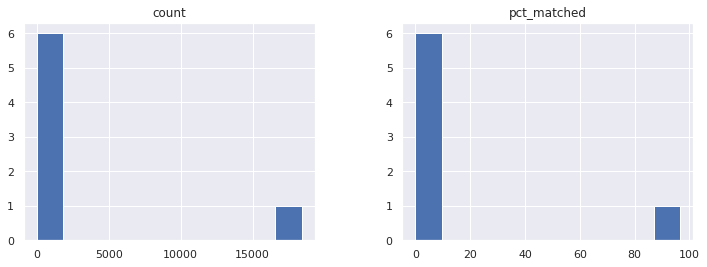

In [39]:
df_box.hist(figsize=(12,4))
plt.show()

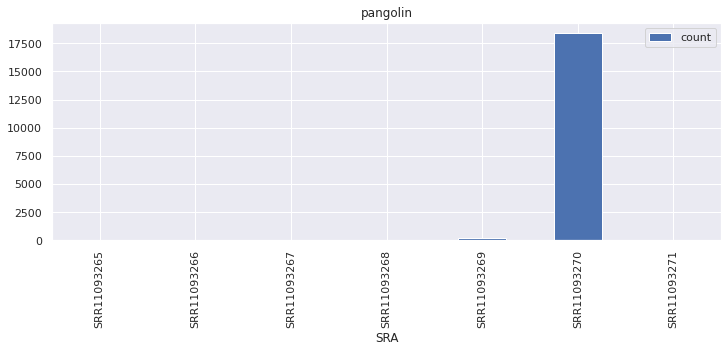

In [40]:
ax=df.plot(x='SRA', y='count', kind='bar',figsize=(12,4))
ax.set_title(s_name, fontsize=12)
plt.show()

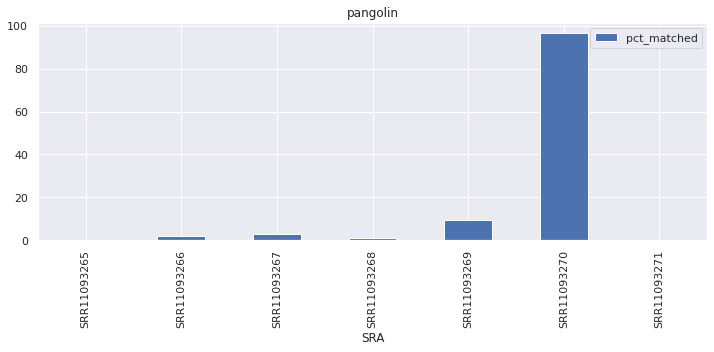

In [41]:
ax=df.plot(x='SRA', y='pct_matched', kind='bar',figsize=(12,4))
ax.set_title(s_name, fontsize=12)
plt.show()

### Mouse

In [42]:
s_name='mouse'

In [43]:
df=df_sra[df_sra['Name'].str.contains(s_name)]

count             AxesSubplot(0.125,0.71587;0.168478x0.16413)
pct_matched    AxesSubplot(0.327174,0.71587;0.168478x0.16413)
dtype: object

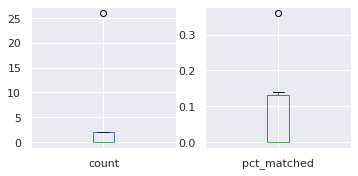

In [44]:
df.drop(columns=['Name'],inplace=True)
sns.set(rc={"figure.figsize":(6, 6)})
df_box=df[['count', 'pct_matched']]
df_box.plot(kind='box', subplots=True, layout=(4,4), sharex=False, sharey=False, figsize=(12,12))

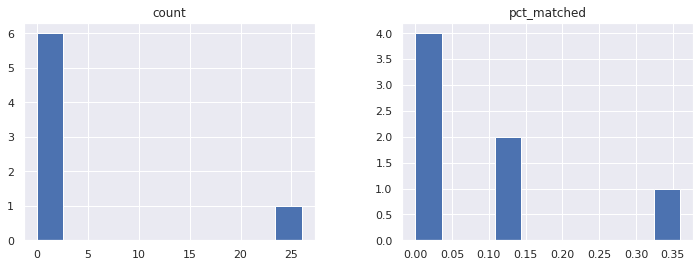

In [45]:
df_box.hist(figsize=(12,4))
plt.show()

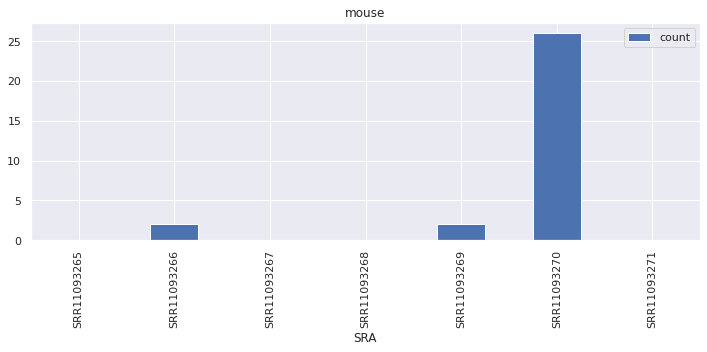

In [46]:
ax=df.plot(x='SRA', y='count', kind='bar',figsize=(12,4))
ax.set_title(s_name, fontsize=12)
plt.show()

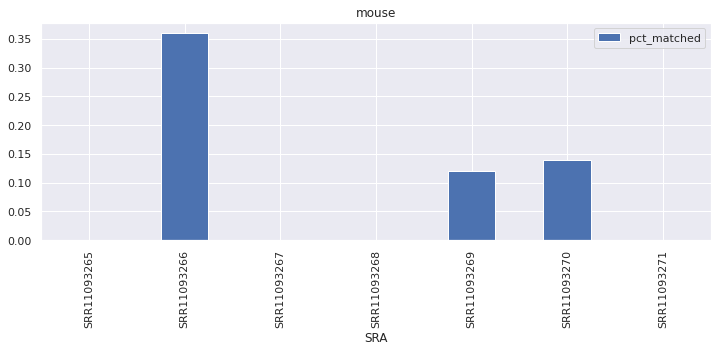

In [47]:
ax=df.plot(x='SRA', y='pct_matched', kind='bar',figsize=(12,4))
ax.set_title(s_name, fontsize=12)
plt.show()

### virus

In [48]:
s_name='virus'

In [49]:
df=df_sra[df_sra['Name'].str.contains(s_name)]

count             AxesSubplot(0.125,0.71587;0.168478x0.16413)
pct_matched    AxesSubplot(0.327174,0.71587;0.168478x0.16413)
dtype: object

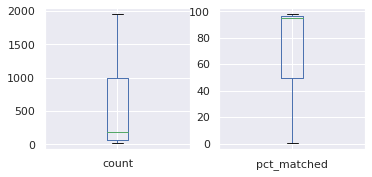

In [50]:
df.drop(columns=['Name'],inplace=True)
sns.set(rc={"figure.figsize":(6, 6)})
df_box=df[['count', 'pct_matched']]
df_box.plot(kind='box', subplots=True, layout=(4,4), sharex=False, sharey=False, figsize=(12,12))

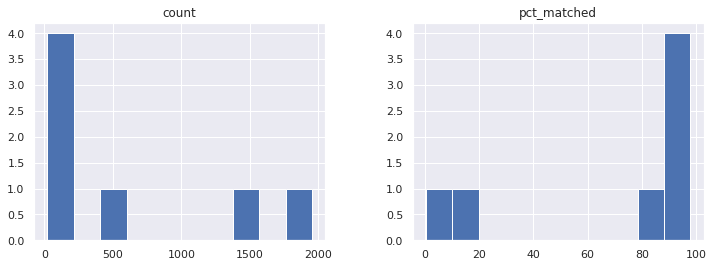

In [51]:
df_box.hist(figsize=(12,4))
plt.show()

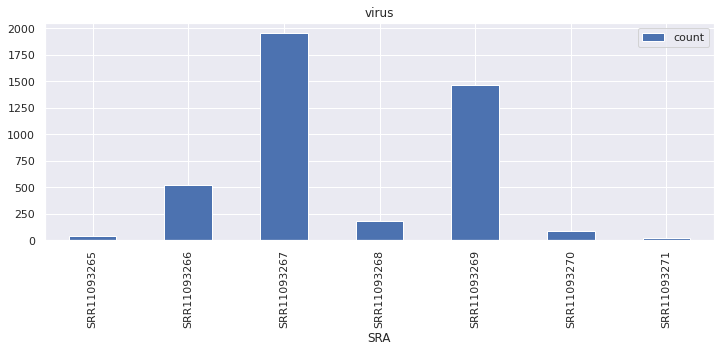

In [52]:
ax=df.plot(x='SRA', y='count', kind='bar',figsize=(12,4))
ax.set_title(s_name, fontsize=12)
plt.show()

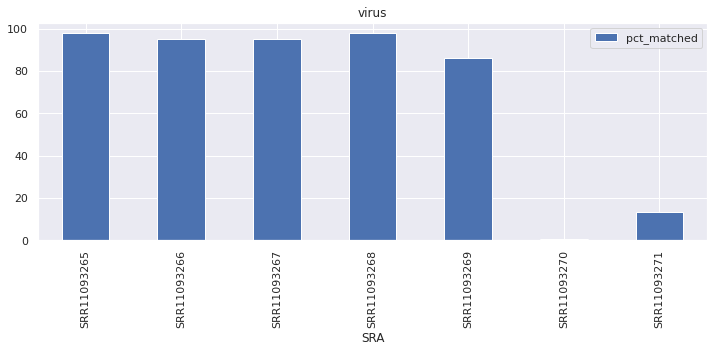

In [53]:
ax=df.plot(x='SRA', y='pct_matched', kind='bar',figsize=(12,4))
ax.set_title(s_name, fontsize=12)
plt.show()

### Top nt database contigs matches per SRA

In [54]:
def get_sra_dict(sra):
    total_dict={}
    asc_desc={}
    accessions, descriptions, counts, total=get_asc_descr_count(sra)
    for asc,desc,cnt in zip(accessions,descriptions, counts):
        if asc in total_dict:
            total_dict[asc]+=int(cnt)
        else:
            total_dict[asc]=int(cnt)
        if asc not in asc_desc:
            asc_desc[asc]=desc
    return total_dict, asc_desc, total

In [55]:
for sra in sra_list:
    total_dict, asc_desc, total= get_sra_dict(sra) 
    print(f'{sra}, number of contigs {total}')
    print_top_n_sp(total_dict, max_num=10)
    print('\n')

SRR11093265, number of contigs 10
Pangolin coronavirus isolate MP789, complete genome :  14
Pangolin coronavirus isolate MP789 genomic sequence :  10
Pangolin coronavirus isolate cDNA8-S surface glycoprotein (S) gene, complete cds :  3
Pangolin coronavirus isolate cDNA9-S surface glycoprotein (S) gene, complete cds :  3
Pangolin coronavirus isolate cDNA16-S surface glycoprotein (S) gene, complete cds :  3
Pangolin coronavirus isolate cDNA18-S surface glycoprotein (S) gene, complete cds :  3
Pangolin coronavirus isolate cDNA20-S surface glycoprotein (S) gene, complete cds :  3
Pangolin coronavirus isolate cDNA31-S surface glycoprotein (S) gene, complete cds :  3
Severe acute respiratory syndrome coronavirus 2 isolate 230077 genome assembly, chromosome: 1 :  1
Synthetic construct clone C35/41, complete sequence :  1


SRR11093266, number of contigs 34
Pangolin coronavirus isolate PCoV_GX-P1E, complete genome :  117
Pangolin coronavirus isolate PCoV_GX-P2V, complete genome :  95
Pangolin 

In [56]:
### Get specific contigs matching a species/name

In [57]:
def write_contigs(sra, match_names): 
    accessions, descriptions, counts, total=get_asc_descr_count(sra)
    asc_matches=[]
    for m in match_names:
        for a,d in zip(accessions, descriptions):
            if m.lower() in d.lower():
                asc_matches.append(a)
    gi_matches=[]
    for a in asc_matches:
        idx=ACCESSIONS.index(a)
        gi=GIS[idx]
        gi_matches.append(gi)
    contigs=[]
    path = BASE_PATH+sra+'/magic_blast/'
    subset_f = open(path+f'{sra}_{match_names[0].replace(" ", "_")}_subset_{f_contigs_file_tail}', 'w')
    with open(path+f'{sra}{f_contigs_file_tail}', 'r') as f:
        lines = [line for line in f]
        for line in lines:
            for gi in gi_matches:
                if gi in line: 
                    parts=line.split('\t')
                    idx=GIS.index(gi)
                    asc=ACCESSIONS[idx]
                    t=TITLES[idx]
                    ps=parts[:2]
                    pe=parts[3:]
                    ps.append(asc+' '+t.rstrip('\n'))
                    parts=ps+pe
                    p='\t'.join(parts)
                    subset_f.write(p)
    subset_f.close()

In [58]:
set_accessions() #time consuming, comment out if already ran
assert ACCESSIONS is not None

In [59]:
#match_names=['vector']
#for sra in sra_list:
#    write_contigs(sra, match_names)

In [60]:
#match_names=['plasmid']
#for sra in sra_list:
#    write_contigs(sra, match_names)

In [61]:
#match_names=['mustela']
#for sra in sra_list:
#    write_contigs(sra, match_names)

In [ ]:
match_names=['virus']
for sra in sra_list:
    write_contigs(sra, match_names)